Installing Sastrawi for StopWord Modules

In [1]:
pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 5.2 MB/s 


Importing Modules for Data Cleansing

In [58]:
import pandas as pd
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
from matplotlib import pyplot as plt
import seaborn as sns

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [100]:
pip install flask

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [116]:
from wordcloud import WordCloud

Mounting Google Drive to Colab

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Reading the documents

In [5]:
data = pd.read_csv("/content/drive/MyDrive/Binar Gold Challenge/data.csv", encoding = 'latin-1')
data_abusive = pd.read_csv("/content/drive/MyDrive/Binar Gold Challenge/abusive.csv", encoding = 'latin-1')
data_slang =pd.read_csv("/content/drive/MyDrive/Binar Gold Challenge/new_kamusalay.csv", encoding = 'latin-1', header = None)
aslang = data_slang[0].values.tolist()
bslang = data_slang[1].values.tolist()
data_slang.rename(columns = {0:'Slang',
                             1:'Baku'},
                  inplace = True)
data_slang

Slang                               Baku
0      anakjakartaasikasik           anak jakarta asyik asyik
1             pakcikdahtua                  pak cik sudah tua
2           pakcikmudalagi                  pak cik muda lagi
3              t3tapjokowi                       tetap jokowi
4                       3x                          tiga kali
...                    ...                                ...
15162            mendikbud  menteri pendidikan dan kebudayaan
15163               mendag                menteri perdagangan
15164              menaker               menteri tenaga kerja
15165             memetwit                            mentwit
15166             megangin                           memegang

[15167 rows x 2 columns]

In [6]:
data

Tweet  HS  Abusive  \
0      - disaat semua cowok berusaha melacak perhatia...   1        1   
1      RT USER: USER siapa yang telat ngasih tau elu?...   0        1   
2      41. Kadang aku berfikir, kenapa aku tetap perc...   0        0   
3      USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...   0        0   
4      USER USER Kaum cebong kapir udah keliatan dong...   1        1   
...                                                  ...  ..      ...   
13164  USER jangan asal ngomong ndasmu. congor lu yg ...   1        1   
13165                       USER Kasur mana enak kunyuk'   0        1   
13166  USER Hati hati bisu :( .g\n\nlagi bosan huft \...   0        0   
13167  USER USER USER USER Bom yang real mudah terdet...   0        0   
13168  USER Mana situ ngasih(": itu cuma foto ya kuti...   1        1   

       HS_Individual  HS_Group  HS_Religion  HS_Race  HS_Physical  HS_Gender  \
0                  1         0            0        0            0          0   
1                  0         0            0        0            0          0   
2                  0         0            0        0            0          0   
3                  0         0            0        0            0          0   
4                  0         1            1        0            0          0   
...              ...       ...          ...      ...          ...        ...   
13164              1         0            0        0            1          0   
13165              0         0            0        0            0          0   
13166              0         0            0        0            0          0   
13167              0         0            0        0            0          0   
13168              1         0            0        0            0          0   

       HS_Other  HS_Weak  HS_Moderate  HS_Strong  
0             1        1            0          0  
1             0        0            0          0  
2             0        0            0          0  
3             0        0            0          0  
4             0        0            1          0  
...         ...      ...          ...        ...  
13164         0        1            0          0  
13165         0        0            0          0  
13166         0        0            0          0  
13167         0        0            0          0  
13168         1        1            0          0  

[13169 rows x 13 columns]

In [7]:
data_abusive

ABUSIVE
0           alay
1          ampas
2           buta
3        keparat
4         anjing
..           ...
120        rezim
121        sange
122       serbet
123        sipit
124  transgender

[125 rows x 1 columns]

Checking and removing tweets' duplications

In [8]:
data_duplicated = data.duplicated(subset=['Tweet']).any()
data_duplicated

True

In [9]:
data_dupclean = data.drop_duplicates()
data_dupclean

Tweet  HS  Abusive  \
0      - disaat semua cowok berusaha melacak perhatia...   1        1   
1      RT USER: USER siapa yang telat ngasih tau elu?...   0        1   
2      41. Kadang aku berfikir, kenapa aku tetap perc...   0        0   
3      USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...   0        0   
4      USER USER Kaum cebong kapir udah keliatan dong...   1        1   
...                                                  ...  ..      ...   
13164  USER jangan asal ngomong ndasmu. congor lu yg ...   1        1   
13165                       USER Kasur mana enak kunyuk'   0        1   
13166  USER Hati hati bisu :( .g\n\nlagi bosan huft \...   0        0   
13167  USER USER USER USER Bom yang real mudah terdet...   0        0   
13168  USER Mana situ ngasih(": itu cuma foto ya kuti...   1        1   

       HS_Individual  HS_Group  HS_Religion  HS_Race  HS_Physical  HS_Gender  \
0                  1         0            0        0            0          0   
1                  0         0            0        0            0          0   
2                  0         0            0        0            0          0   
3                  0         0            0        0            0          0   
4                  0         1            1        0            0          0   
...              ...       ...          ...      ...          ...        ...   
13164              1         0            0        0            1          0   
13165              0         0            0        0            0          0   
13166              0         0            0        0            0          0   
13167              0         0            0        0            0          0   
13168              1         0            0        0            0          0   

       HS_Other  HS_Weak  HS_Moderate  HS_Strong  
0             1        1            0          0  
1             0        0            0          0  
2             0        0            0          0  
3             0        0            0          0  
4             0        0            1          0  
...         ...      ...          ...        ...  
13164         0        1            0          0  
13165         0        0            0          0  
13166         0        0            0          0  
13167         0        0            0          0  
13168         1        1            0          0  

[13044 rows x 13 columns]

In [13]:
data_dupclean = data_dupclean.reset_index(drop=True)
data_dupclean

Tweet  HS  Abusive  \
0      - disaat semua cowok berusaha melacak perhatia...   1        1   
1      RT USER: USER siapa yang telat ngasih tau elu?...   0        1   
2      41. Kadang aku berfikir, kenapa aku tetap perc...   0        0   
3      USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...   0        0   
4      USER USER Kaum cebong kapir udah keliatan dong...   1        1   
...                                                  ...  ..      ...   
13039  USER jangan asal ngomong ndasmu. congor lu yg ...   1        1   
13040                       USER Kasur mana enak kunyuk'   0        1   
13041  USER Hati hati bisu :( .g\n\nlagi bosan huft \...   0        0   
13042  USER USER USER USER Bom yang real mudah terdet...   0        0   
13043  USER Mana situ ngasih(": itu cuma foto ya kuti...   1        1   

       HS_Individual  HS_Group  HS_Religion  HS_Race  HS_Physical  HS_Gender  \
0                  1         0            0        0            0          0   
1                  0         0            0        0            0          0   
2                  0         0            0        0            0          0   
3                  0         0            0        0            0          0   
4                  0         1            1        0            0          0   
...              ...       ...          ...      ...          ...        ...   
13039              1         0            0        0            1          0   
13040              0         0            0        0            0          0   
13041              0         0            0        0            0          0   
13042              0         0            0        0            0          0   
13043              1         0            0        0            0          0   

       HS_Other  HS_Weak  HS_Moderate  HS_Strong  
0             1        1            0          0  
1             0        0            0          0  
2             0        0            0          0  
3             0        0            0          0  
4             0        0            1          0  
...         ...      ...          ...        ...  
13039         0        1            0          0  
13040         0        0            0          0  
13041         0        0            0          0  
13042         0        0            0          0  
13043         1        1            0          0  

[13044 rows x 13 columns]

In [15]:
data_dupclean.Tweet

0        - disaat semua cowok berusaha melacak perhatia...
1        RT USER: USER siapa yang telat ngasih tau elu?...
2        41. Kadang aku berfikir, kenapa aku tetap perc...
3        USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...
4        USER USER Kaum cebong kapir udah keliatan dong...
                               ...                        
13039    USER jangan asal ngomong ndasmu. congor lu yg ...
13040                         USER Kasur mana enak kunyuk'
13041    USER Hati hati bisu :( .g\n\nlagi bosan huft \...
13042    USER USER USER USER Bom yang real mudah terdet...
13043    USER Mana situ ngasih(": itu cuma foto ya kuti...
Name: Tweet, Length: 13044, dtype: object

In [18]:
def lowering(Tweet):
  Tweet = str(Tweet)
  return Tweet.lower()
data_dupclean['Tweet'] = data_dupclean['Tweet'].apply(lowering)

Tweet  HS  Abusive  \
0      - disaat semua cowok berusaha melacak perhatia...   1        1   
1      rt user: user siapa yang telat ngasih tau elu?...   0        1   
2      41. kadang aku berfikir, kenapa aku tetap perc...   0        0   
3      user user aku itu aku\n\nku tau matamu sipit t...   0        0   
4      user user kaum cebong kapir udah keliatan dong...   1        1   
...                                                  ...  ..      ...   
13039  user jangan asal ngomong ndasmu. congor lu yg ...   1        1   
13040                       user kasur mana enak kunyuk'   0        1   
13041  user hati hati bisu :( .g\n\nlagi bosan huft \...   0        0   
13042  user user user user bom yang real mudah terdet...   0        0   
13043  user mana situ ngasih(": itu cuma foto ya kuti...   1        1   

       HS_Individual  HS_Group  HS_Religion  HS_Race  HS_Physical  HS_Gender  \
0                  1         0            0        0            0          0   
1                  0         0            0        0            0          0   
2                  0         0            0        0            0          0   
3                  0         0            0        0            0          0   
4                  0         1            1        0            0          0   
...              ...       ...          ...      ...          ...        ...   
13039              1         0            0        0            1          0   
13040              0         0            0        0            0          0   
13041              0         0            0        0            0          0   
13042              0         0            0        0            0          0   
13043              1         0            0        0            0          0   

       HS_Other  HS_Weak  HS_Moderate  HS_Strong  
0             1        1            0          0  
1             0        0            0          0  
2             0        0            0          0  
3             0        0            0          0  
4             0        0            1          0  
...         ...      ...          ...        ...  
13039         0        1            0          0  
13040         0        0            0          0  
13041         0        0            0          0  
13042         0        0            0          0  
13043         1        1            0          0  

[13044 rows x 13 columns]

Cleansing the the words 'user' and 'rt', symbols, emoticons, excess spaces, and url

In [23]:
data_dupclean.Tweet

0        - disaat semua cowok berusaha melacak perhatia...
1        rt user: user siapa yang telat ngasih tau elu?...
2        41. kadang aku berfikir, kenapa aku tetap perc...
3        user user aku itu aku\n\nku tau matamu sipit t...
4        user user kaum cebong kapir udah keliatan dong...
                               ...                        
13039    user jangan asal ngomong ndasmu. congor lu yg ...
13040                         user kasur mana enak kunyuk'
13041    user hati hati bisu :( .g\n\nlagi bosan huft \...
13042    user user user user bom yang real mudah terdet...
13043    user mana situ ngasih(": itu cuma foto ya kuti...
Name: Tweet, Length: 13044, dtype: object

In [25]:
def delete_user(Tweet):
    return re.sub('user','', Tweet)
user_text = data_dupclean.Tweet.apply(delete_user)
user_text

0        - disaat semua cowok berusaha melacak perhatia...
1        rt :  siapa yang telat ngasih tau elu?edan sar...
2        41. kadang aku berfikir, kenapa aku tetap perc...
3          aku itu aku\n\nku tau matamu sipit tapi dili...
4          kaum cebong kapir udah keliatan dongoknya da...
                               ...                        
13039     jangan asal ngomong ndasmu. congor lu yg seka...
13040                              kasur mana enak kunyuk'
13041     hati hati bisu :( .g\n\nlagi bosan huft \xf0\...
13042        bom yang real mudah terdeteksi bom yang te...
13043     mana situ ngasih(": itu cuma foto ya kutil onta'
Name: Tweet, Length: 13044, dtype: object

In [26]:
def delete_user(Tweet):
    return re.sub('rt','', Tweet)
rt_text = user_text.apply(delete_user)
rt_text

0        - disaat semua cowok berusaha melacak perhatia...
1         :  siapa yang telat ngasih tau elu?edan sarap...
2        41. kadang aku berfikir, kenapa aku tetap perc...
3          aku itu aku\n\nku tau matamu sipit tapi dili...
4          kaum cebong kapir udah keliatan dongoknya da...
                               ...                        
13039     jangan asal ngomong ndasmu. congor lu yg seka...
13040                              kasur mana enak kunyuk'
13041     hati hati bisu :( .g\n\nlagi bosan huft \xf0\...
13042        bom yang real mudah terdeteksi bom yang te...
13043     mana situ ngasih(": itu cuma foto ya kutil onta'
Name: Tweet, Length: 13044, dtype: object

In [30]:
def delete_symbol(Tweet):
    return re.sub('\W',' ', Tweet)
symbol_text = rt_text.apply(delete_symbol)
symbol_text

0          disaat semua cowok berusaha melacak perhatia...
1            siapa yang telat ngasih tau elu edan sarap...
2        41  kadang aku berfikir  kenapa aku tetap perc...
3          aku itu aku n nku tau matamu sipit tapi dili...
4          kaum cebong kapir udah keliatan dongoknya da...
                               ...                        
13039     jangan asal ngomong ndasmu  congor lu yg seka...
13040                              kasur mana enak kunyuk 
13041     hati hati bisu     g n nlagi bosan huft  xf0 ...
13042        bom yang real mudah terdeteksi bom yang te...
13043     mana situ ngasih    itu cuma foto ya kutil onta 
Name: Tweet, Length: 13044, dtype: object

In [45]:
def delete_emote(Tweet):
    return re.sub('x[\w,\d]','', Tweet)
emote_text = symbol_text.apply(delete_emote)
emote_text

0          disaat semua cowok berusaha melacak perhatia...
1            siapa yang telat ngasih tau elu edan sarap...
2        41  kadang aku berfikir  kenapa aku tetap perc...
3          aku itu aku n nku tau matamu sipit tapi dili...
4          kaum cebong kapir udah keliatan dongoknya da...
                               ...                        
13039     jangan asal ngomong ndasmu  congor lu yg seka...
13040                              kasur mana enak kunyuk 
13041     hati hati bisu     g n nlagi bosan huft  0 f ...
13042        bom yang real mudah terdeteksi bom yang te...
13043     mana situ ngasih    itu cuma foto ya kutil onta 
Name: Tweet, Length: 13044, dtype: object

In [46]:
def delete_space(Tweet):
    return re.sub('\s+',' ',Tweet)
space_text = emote_text.apply(delete_space)
space_text

0         disaat semua cowok berusaha melacak perhatian...
1         siapa yang telat ngasih tau elu edan sarap gu...
2        41 kadang aku berfikir kenapa aku tetap percay...
3         aku itu aku n nku tau matamu sipit tapi dilia...
4         kaum cebong kapir udah keliatan dongoknya dar...
                               ...                        
13039     jangan asal ngomong ndasmu congor lu yg sekat...
13040                              kasur mana enak kunyuk 
13041         hati hati bisu g n nlagi bosan huft 0 f 8 a 
13042     bom yang real mudah terdeteksi bom yang terku...
13043        mana situ ngasih itu cuma foto ya kutil onta 
Name: Tweet, Length: 13044, dtype: object

In [47]:
def delete_url(Tweet):
    return re.sub('url','', Tweet)
url_text = space_text.apply(delete_url)
url_text

0         disaat semua cowok berusaha melacak perhatian...
1         siapa yang telat ngasih tau elu edan sarap gu...
2        41 kadang aku berfikir kenapa aku tetap percay...
3         aku itu aku n nku tau matamu sipit tapi dilia...
4         kaum cebong kapir udah keliatan dongoknya dar...
                               ...                        
13039     jangan asal ngomong ndasmu congor lu yg sekat...
13040                              kasur mana enak kunyuk 
13041         hati hati bisu g n nlagi bosan huft 0 f 8 a 
13042     bom yang real mudah terdeteksi bom yang terku...
13043        mana situ ngasih itu cuma foto ya kutil onta 
Name: Tweet, Length: 13044, dtype: object

In [48]:
def converted_values(Tweet):
    return Tweet.values.tolist()
converted_text = converted_values(url_text)
converted_text

[' disaat semua cowok berusaha melacak perhatian gue loe lantas remehkan perhatian yg gue kasih khusus ke elo basic elo cowok bego ',
 ' siapa yang telat ngasih tau elu edan sarap gue bergaul dengan cigax jifla calis sama siapa noh licew juga ',
 '41 kadang aku berfikir kenapa aku tetap percaya pada tuhan padahal aku selalu jatuh berkali kali kadang aku merasa tuhan itu ninggalkan aku sendirian ketika orangtuaku berencana berpisah ketika kakakku lebih memilih jadi kristen ketika aku anak ter',
 ' aku itu aku n nku tau matamu sipit tapi diliat dari mana itu aku ',
 ' kaum cebong kapir udah keliatan dongoknya dari awal tambah dongok lagi hahahah ',
 ' ya bani taplak dkk 0 f 8 4 0 f 8 4 0 f 8 4 ',
 'deklarasi pilkada 2018 aman dan anti hoax warga dukuh sari jabon',
 'gue baru aja kelar re watch aldnoah zero paling kampret emang endingnya 2 karakter utama cowonya kena friendzone bray ',
 'nah admin belanja satu lagi po terbaik nak makan ais kepal milo ais kepal horlicks atau cendol toping 

Filtering slang words

In [51]:
def split_text(Tweet):
  strtext  = str(Tweet)
  return strtext.split()
split_text = split_text(converted_text)
print(split_text)

["['", 'disaat', 'semua', 'cowok', 'berusaha', 'melacak', 'perhatian', 'gue', 'loe', 'lantas', 'remehkan', 'perhatian', 'yg', 'gue', 'kasih', 'khusus', 'ke', 'elo', 'basic', 'elo', 'cowok', 'bego', "',", "'", 'siapa', 'yang', 'telat', 'ngasih', 'tau', 'elu', 'edan', 'sarap', 'gue', 'bergaul', 'dengan', 'cigax', 'jifla', 'calis', 'sama', 'siapa', 'noh', 'licew', 'juga', "',", "'41", 'kadang', 'aku', 'berfikir', 'kenapa', 'aku', 'tetap', 'percaya', 'pada', 'tuhan', 'padahal', 'aku', 'selalu', 'jatuh', 'berkali', 'kali', 'kadang', 'aku', 'merasa', 'tuhan', 'itu', 'ninggalkan', 'aku', 'sendirian', 'ketika', 'orangtuaku', 'berencana', 'berpisah', 'ketika', 'kakakku', 'lebih', 'memilih', 'jadi', 'kristen', 'ketika', 'aku', 'anak', "ter',", "'", 'aku', 'itu', 'aku', 'n', 'nku', 'tau', 'matamu', 'sipit', 'tapi', 'diliat', 'dari', 'mana', 'itu', 'aku', "',", "'", 'kaum', 'cebong', 'kapir', 'udah', 'keliatan', 'dongoknya', 'dari', 'awal', 'tambah', 'dongok', 'lagi', 'hahahah', "',", "'", 'ya', '

In [53]:
d_slang = dict(zip(aslang,bslang))
katabaku = []
for wrd in split_text:
  katabaku.append(d_slang.get(wrd, wrd))
katabaku

["['",
 'di saat',
 'semua',
 'cowok',
 'berusaha',
 'melacak',
 'perhatian',
 'gue',
 'kamu',
 'lantas',
 'remehkan',
 'perhatian',
 'yang',
 'gue',
 'kasih',
 'khusus',
 'ke',
 'kamu',
 'basic',
 'kamu',
 'cowok',
 'bego',
 "',",
 "'",
 'siapa',
 'yang',
 'telat',
 'memberi',
 'tau',
 'kamu',
 'edan',
 'sarap',
 'gue',
 'bergaul',
 'dengan',
 'cigax',
 'jifla',
 'calis',
 'sama',
 'siapa',
 'itu',
 'licew',
 'juga',
 "',",
 "'41",
 'kadang',
 'aku',
 'berpikir',
 'kenapa',
 'aku',
 'tetap',
 'percaya',
 'pada',
 'tuhan',
 'padahal',
 'aku',
 'selalu',
 'jatuh',
 'berkali',
 'kali',
 'kadang',
 'aku',
 'merasa',
 'tuhan',
 'itu',
 'meninggalkan',
 'aku',
 'sendirian',
 'ketika',
 'orang tuaku',
 'berencana',
 'berpisah',
 'ketika',
 'kakakku',
 'lebih',
 'memilih',
 'jadi',
 'kristen',
 'ketika',
 'aku',
 'anak',
 "ter',",
 "'",
 'aku',
 'itu',
 'aku',
 'dan',
 'ku',
 'tau',
 'matamu',
 'sipit',
 'tapi',
 'dilihat',
 'dari',
 'mana',
 'itu',
 'aku',
 "',",
 "'",
 'kaum',
 'cebong',
 '

In [59]:
stop_words = stopwords.words("indonesian")
stopfactory = StopWordRemoverFactory().get_stop_words()
kata = set(stop_words + stopfactory)
len(kata)

774

In [61]:
filtered_word=[]
for w in katabaku:
  if w not in kata:
    filtered_word.append(w)
print(filtered_word)

["['", 'di saat', 'cowok', 'berusaha', 'melacak', 'perhatian', 'gue', 'lantas', 'remehkan', 'perhatian', 'gue', 'kasih', 'khusus', 'basic', 'cowok', 'bego', "',", "'", 'telat', 'tau', 'edan', 'sarap', 'gue', 'bergaul', 'cigax', 'jifla', 'calis', 'licew', "',", "'41", 'kadang', 'berpikir', 'percaya', 'tuhan', 'jatuh', 'berkali', 'kali', 'kadang', 'tuhan', 'meninggalkan', 'orang tuaku', 'berencana', 'berpisah', 'kakakku', 'memilih', 'kristen', 'anak', "ter',", "'", 'ku', 'tau', 'matamu', 'sipit', "',", "'", 'kaum', 'cebong', 'kafir', 'dongoknya', 'dungu', 'haha', "',", "'", 'bani', 'taplak', 'dan kawan kawan', '0', 'f', '8', '4', '0', 'f', '8', '4', '0', 'f', '8', '4', "',", "'deklarasi", 'pilihan kepala daerah', '2018', 'aman', 'anti', 'hoaks', 'warga', 'dukuh', 'sari', "jabon',", "'gue", 'selesai', 're', 'watch', 'aldnoah', 'zero', 'kampret', '2', 'karakter', 'utama', 'cowoknya', 'kena', 'friendzone', 'bro', "',", "'nah", 'admin', 'belanja', 'po', 'terbaik', 'nak', 'makan', 'ais', 'kep

In [63]:
string =" "
string1 = string.join(filtered_word)
splitan = string1.split(',')
print(splitan)

["[' di saat cowok berusaha melacak perhatian gue lantas remehkan perhatian gue kasih khusus basic cowok bego '", " ' telat tau edan sarap gue bergaul cigax jifla calis licew '", " '41 kadang berpikir percaya tuhan jatuh berkali kali kadang tuhan meninggalkan orang tuaku berencana berpisah kakakku memilih kristen anak ter'", " ' ku tau matamu sipit '", " ' kaum cebong kafir dongoknya dungu haha '", " ' bani taplak dan kawan kawan 0 f 8 4 0 f 8 4 0 f 8 4 '", " 'deklarasi pilihan kepala daerah 2018 aman anti hoaks warga dukuh sari jabon'", " 'gue selesai re watch aldnoah zero kampret 2 karakter utama cowoknya kena friendzone bro '", " 'nah admin belanja po terbaik nak makan ais kepal milo ais kepal horlicks cendol toping kau kau ð doket gerai rozak meuaku taipan 2 kembar baby amp romantika bank islam senawang ð '", " ' enak ngewe '", " 'setidaknya gue jari gue ukur nyali bacot 0 f 8 f '", " ' banci kaleng malu peanyaan 2 nyungsep koe '", " 'kalo belajar ekonomi mestinya jago memprivatisa

In [70]:
import numpy as np
new_data_dupclean = np.array_split(splitan, 13043)
for array in new_data_dupclean:
  print(list(array))

Streaming output truncated to the last 5000 lines.
[" 'wisata budaya kabupaten sukabumi '"]
[" ' islam hindu pas '"]
[" ' cocot kintil '"]
[" 'merindukan mu beai mengajarkan ku pembunuh ulung rindu bunuh bom menghancurkan eaakkk '"]
[" 'diem anjing daniel edan '"]
[" 'jangan langsung mematenkan buku komunis buku ekstrem baca pelajari buku terlarang bermanfaat belajar sejarah indonesia '"]
[" ' tolol sih cal laki '"]
[" ' persib kunyuk 0 f 8 2 0 f 8 2 0 f 8 2 '"]
[" 'kl taat tuhan malam kemarin ejek pengecut perek pelacur wanita wanita rendah ejek suamimu takut suamimu mas bilang dirimu bajingan laluku gelap bajingan '"]
[" 'presiden as beemu pm jepang florida as membicarakan denuklirisasi korea utara cnnidnewsroom'"]
[" ' agama hindu karma ainya perbuatan bahasa sansekea berbuat apapun karma lakukan jalani '"]
[" 'gimana gimanaaaa cerita barel allegedly tas isinya bom astagfirullah '"]
[" ' cupu '"]
[" ' nek guyon marai mematikan rezekinya konco namanya bajingan lucu ketemunya '"]
[" '

Analyzing data

In [87]:
data_dupclean['total_word'] = data_dupclean.Tweet.apply(lambda words: len(words.split()))
data_dupclean

Tweet  HS  Abusive  \
0      - disaat semua cowok berusaha melacak perhatia...   1        1   
1      rt user: user siapa yang telat ngasih tau elu?...   0        1   
2      41. kadang aku berfikir, kenapa aku tetap perc...   0        0   
3      user user aku itu aku\n\nku tau matamu sipit t...   0        0   
4      user user kaum cebong kapir udah keliatan dong...   1        1   
...                                                  ...  ..      ...   
13039  user jangan asal ngomong ndasmu. congor lu yg ...   1        1   
13040                       user kasur mana enak kunyuk'   0        1   
13041  user hati hati bisu :( .g\n\nlagi bosan huft \...   0        0   
13042  user user user user bom yang real mudah terdet...   0        0   
13043  user mana situ ngasih(": itu cuma foto ya kuti...   1        1   

       HS_Individual  HS_Group  HS_Religion  HS_Race  HS_Physical  HS_Gender  \
0                  1         0            0        0            0          0   
1                  0         0            0        0            0          0   
2                  0         0            0        0            0          0   
3                  0         0            0        0            0          0   
4                  0         1            1        0            0          0   
...              ...       ...          ...      ...          ...        ...   
13039              1         0            0        0            1          0   
13040              0         0            0        0            0          0   
13041              0         0            0        0            0          0   
13042              0         0            0        0            0          0   
13043              1         0            0        0            0          0   

       HS_Other  HS_Weak  HS_Moderate  HS_Strong  total_word  
0             1        1            0          0          25  
1             0        0            0          0          21  
2             0        0            0          0          37  
3             0        0            0          0          14  
4             0        0            1          0          14  
...         ...      ...          ...        ...         ...  
13039         0        1            0          0          10  
13040         0        0            0          0           5  
13041         0        0            0          0           9  
13042         0        0            0          0          22  
13043         1        1            0          0          10  

[13044 rows x 14 columns]

In [129]:
data_dupclean.total_word.mode()

0    11
dtype: int64

In [103]:
data_dupclean.total_word.mean()

17.264259429622815

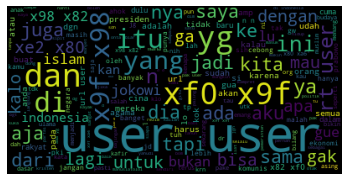

In [118]:
Tweet = ' '.join(data_dupclean['Tweet'])
wordcloud = WordCloud().generate(Tweet)

# Generate plot
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [88]:
data_dupclean_abusivetweet = data_dupclean[data_dupclean['Abusive'] == 1]
data_dupclean_abusivetweet.shape

(5005, 14)

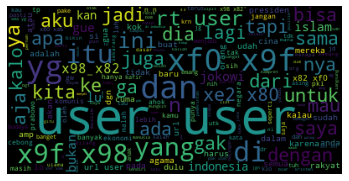

In [119]:
Abusive_Tweet = ' '.join(data_dupclean_abusivetweet['Tweet'])
wordcloud = WordCloud().generate(Tweet)

# Generate plot
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [105]:
data_dupclean_abusivetweet.total_word.mean()

14.754445554445555

In [89]:
data_dupclean_hatetweet = data_dupclean[data_dupclean['HS'] == 1]
data_dupclean_hatetweet.shape

(5518, 14)

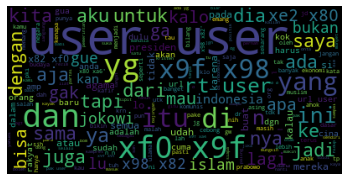

In [120]:
Hate_Tweet = ' '.join(data_dupclean_hatetweet['Tweet'])
wordcloud = WordCloud().generate(Tweet)

# Generate plot
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [106]:
data_dupclean_hatetweet.total_word.mean()

15.72689380210221

In [90]:
data_dupclean_hateindividual = data_dupclean[data_dupclean['HS_Individual'] == 1]
data_dupclean_hateindividual.shape

(3540, 14)

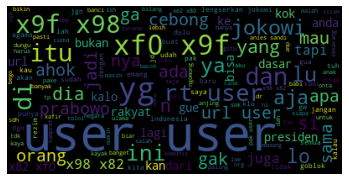

In [121]:
Tweet = ' '.join(data_dupclean_hateindividual['Tweet'])
wordcloud = WordCloud().generate(Tweet)

# Generate plot
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [107]:
data_dupclean_hateindividual.total_word.mean()

15.265254237288136

In [91]:
data_dupclean_hategroup = data_dupclean[data_dupclean['HS_Group'] == 1]
data_dupclean_hategroup.shape

(1978, 14)

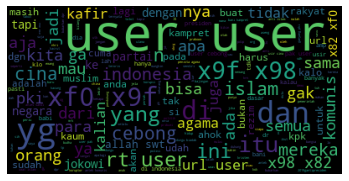

In [122]:
Tweet = ' '.join(data_dupclean_hategroup['Tweet'])
wordcloud = WordCloud().generate(Tweet)

# Generate plot
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [108]:
data_dupclean_hategroup.total_word.mean()

16.553083923154702

In [92]:
data_dupclean_hatereligion = data_dupclean[data_dupclean['HS_Religion'] == 1]
data_dupclean_hatereligion.shape

(789, 14)

In [ ]:
Tweet = ' '.join(data_dupclean_hatereligion['Tweet'])
wordcloud = WordCloud().generate(Tweet)

# Generate plot
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [109]:
data_dupclean_hatereligion.total_word.mean()

17.44106463878327

In [93]:
data_dupclean_haterace = data_dupclean[data_dupclean['HS_Race'] == 1]
data_dupclean_haterace.shape

(563, 14)

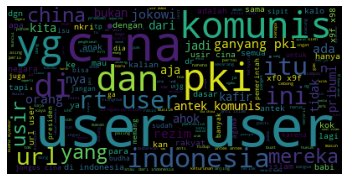

In [123]:
Tweet = ' '.join(data_dupclean_haterace['Tweet'])
wordcloud = WordCloud().generate(Tweet)

# Generate plot
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [110]:
data_dupclean_haterace.total_word.mean()

14.939609236234459

In [94]:
data_dupclean_hatephysical = data_dupclean[data_dupclean['HS_Physical'] == 1]
data_dupclean_hatephysical.shape

(322, 14)

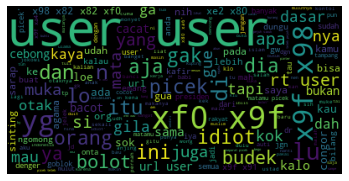

In [124]:
Tweet = ' '.join(data_dupclean_hatephysical['Tweet'])
wordcloud = WordCloud().generate(Tweet)

# Generate plot
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [111]:
data_dupclean_hatephysical.total_word.mean()

14.993788819875776

In [95]:
data_dupclean_hateother = data_dupclean[data_dupclean['HS_Other'] == 1]
data_dupclean_hateother.shape

(3706, 14)

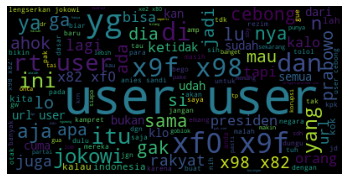

In [125]:
Tweet = ' '.join(data_dupclean_hateother['Tweet'])
wordcloud = WordCloud().generate(Tweet)

# Generate plot
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [112]:
data_dupclean_hateother.total_word.mean()

15.61980572045332

In [96]:
data_dupclean_hateweak = data_dupclean[data_dupclean['HS_Weak'] == 1]
data_dupclean_hateweak.shape

(3348, 14)

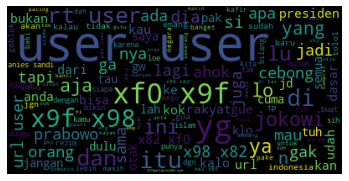

In [126]:
Tweet = ' '.join(data_dupclean_hateweak['Tweet'])
wordcloud = WordCloud().generate(Tweet)

# Generate plot
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [113]:
data_dupclean_hateweak.total_word.mean()

15.375149342891278

In [97]:
data_dupclean_hatemoderate = data_dupclean[data_dupclean['HS_Moderate'] == 1]
data_dupclean_hatemoderate.shape

(1698, 14)

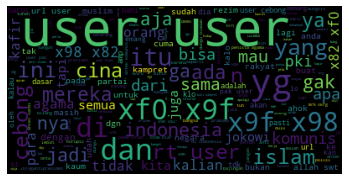

In [127]:
Tweet = ' '.join(data_dupclean_hatemoderate['Tweet'])
wordcloud = WordCloud().generate(Tweet)

# Generate plot
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [114]:
data_dupclean_hatemoderate.total_word.mean()

17.090694935217904

In [99]:
data_dupclean_hatestrong = data_dupclean[data_dupclean['HS_Strong'] == 1]
data_dupclean_hatestrong.shape

(472, 14)

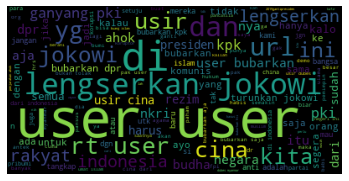

In [128]:
Tweet = ' '.join(data_dupclean_hatestrong['Tweet'])
wordcloud = WordCloud().generate(Tweet)

# Generate plot
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [115]:
data_dupclean_hatestrong.total_word.mean()

13.315677966101696

KeyError: ignored

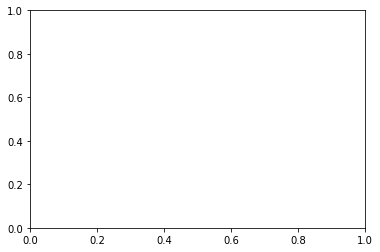

In [139]:
x = data_dupclean_abusivetweet.total_word
y = data_dupclean_hatetweet.total_word
data_dupclean.plot(x,y,kind = 'scatter')